In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat


In [2]:
class square:
    def __init__(self, tl, br):
        self.top_left = tl
        self.bottom_right = br
        self.transform()
        
    def transform(self):
        self.ll = [self.top_left[0], self.bottom_right[1]]
        self.width = self.bottom_right[0] - self.top_left[0]
        self.height = self.top_left[1] - self.bottom_right[1]
        

obs1 = square([1,9], [3,7])
obs2 = square([9,3], [10,-10])
obs3 = square([2,0], [4,-3])
obs4 = square([8,9], [9,7])

play_ground = square([0,10], [10,-10])
start = [5,-9]
goal = [0,10]

In [3]:
path = np.loadtxt('build/unit_tests/path.csv')
print(path)

[[ 0.       10.      ]
 [ 0.798282  9.58203 ]
 [ 1.68419   9.11817 ]
 [ 2.57771   9.56721 ]
 [ 3.57694   9.60627 ]
 [ 4.32614   8.94392 ]
 [ 5.03322   8.82727 ]
 [ 5.56323   7.97928 ]
 [ 5.88536   7.03258 ]
 [ 5.32462   6.20459 ]
 [ 5.46862   5.21501 ]
 [ 5.22904   4.24414 ]
 [ 5.67784   3.3505  ]
 [ 5.69229   2.35061 ]
 [ 6.07029   1.4248  ]
 [ 5.7136    0.490578]
 [ 5.68155  -0.508908]
 [ 5.74078  -1.50715 ]
 [ 6.47637  -2.18458 ]
 [ 6.11487  -3.11695 ]
 [ 5.86489  -4.08521 ]
 [ 5.65659  -5.06327 ]
 [ 5.50966  -6.05242 ]
 [ 5.25197  -7.01864 ]
 [ 5.07458  -8.00278 ]
 [ 5.       -9.      ]]


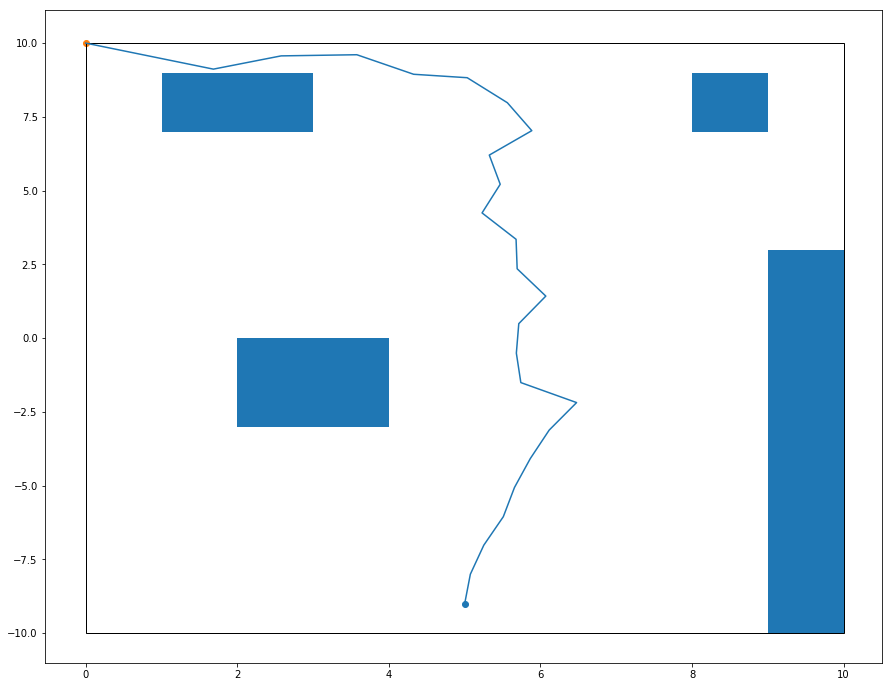

In [4]:
fig, ax = plt.subplots(figsize=[15,12])
ax.add_patch(pat.Rectangle(play_ground.ll, play_ground.width, play_ground.height, fill=False))
ax.add_patch(pat.Rectangle(obs1.ll, obs1.width, obs1.height))
ax.add_patch(pat.Rectangle(obs2.ll, obs2.width, obs2.height))
ax.add_patch(pat.Rectangle(obs3.ll, obs3.width, obs3.height))
ax.add_patch(pat.Rectangle(obs4.ll, obs4.width, obs4.height))


plt.plot(path[:,0], path[:,1])
plt.scatter(start[0], start[1])
plt.scatter(goal[0], goal[1])

